First, import the necessary libraries and define our data paths:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [28]:
google_colab = False
if google_colab:
    data_folder = '/content/sample_data/'
else:
    data_folder = './Data/'

In [46]:
characters = pd.read_csv(data_folder + "character.metadata.tsv", sep='\t', header = None)
characters.columns = ('Wikipedia movie ID', 'Freebase movie ID', 'Movie release date',
              'Character name', 'Actor date of birth', 'Actor gender',
              'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 
              'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 
              'Freebase actor ID')

In [110]:
movies = pd.read_csv(data_folder + "movie.metadata.tsv", sep='\t', header = None)
movies.columns = ('Wikipedia movie ID' , 'Freebase movie ID' , 'Movie name' , 
                'Movie release date' , 'Movie box office revenue' , 
                'Movie runtime' , 'Movie languages' , 'Movie countries' , 'Movie genres')

movies['Movie release date'] = pd.to_datetime(movies['Movie release date'], errors = 'coerce').dt.year
# change all formats to datetime and keep the year only
print(pd.unique(movies['Movie release date'])[0:20])

[2001. 2000. 1988. 1987. 1983. 1913. 2002. 1938. 1974. 1960. 1930. 1997.
 1989. 1986.   nan 1984. 1964. 1967. 1992. 1999.]


**Note:** : Many of the date formats are inconsistent. Here we convert it all to just year as this is the temporal resolution in which we are interested

In [111]:
movies.sample(3)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
35259,19135077,/m/04jb8wh,Out of the Shadow,NaN,NaN,NaN,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Mystery""}"
56204,10970272,/m/02qwpwj,Catalina Caper,1967.0,NaN,84.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/04t36"": ""Musical""..."
55446,17608318,/m/04j17c0,Two Soldiers,2004.0,NaN,40.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/07s9rl0"": ""Dra..."


In [112]:
print('There are {} entries in the movies dataset'.format(len(movies)))

There are 81741 entries in the movies dataset


In [113]:
for name, values in movies.items():
    print ('{:.4} % of movies have an associated {}'.format(100 * len(values.loc[values.notnull()])/len(values), name))

100.0 % of movies have an associated Wikipedia movie ID
100.0 % of movies have an associated Freebase movie ID
100.0 % of movies have an associated Movie name
91.56 % of movies have an associated Movie release date
10.28 % of movies have an associated Movie box office revenue
74.98 % of movies have an associated Movie runtime
100.0 % of movies have an associated Movie languages
100.0 % of movies have an associated Movie countries
100.0 % of movies have an associated Movie genres


**Note :** Any analysis based on the movie revenue (as a measure of success) will need extra information, as probably basing the study only in 10% of the data is not enough.



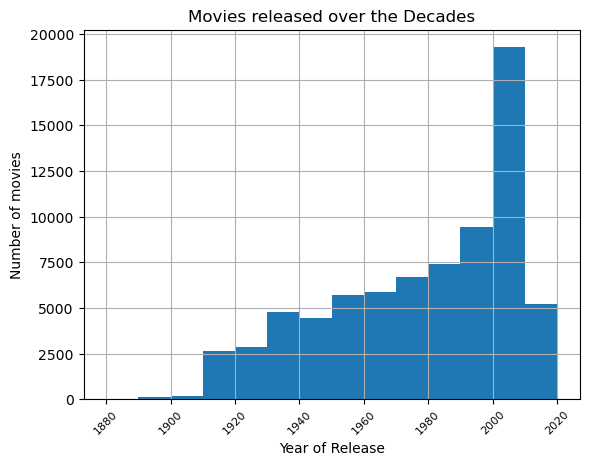

In [114]:
movies['Movie release date'].hist(bins = range(1880,2030,10), grid = True, xlabelsize = 8 ,xrot = 45)
plt.xlabel('Year of Release')
plt.ylabel('Number of movies')
plt.title('Movies released over the Decades');

**Note:** On 16 December 2014, Google announced that it would shut down Freebase over the succeeding six months and help with the move of the data from Freebase to Wikidata. Data collection does not go through the entire 2010's decade

In [115]:
print('The dataset is comprised of movies with known releases between {0:n} and {1:n} '.format(movies['Movie release date'].min(), 
                                                                                               movies['Movie release date'].max()))

The dataset is comprised of movies with known releases between 1888 and 2016 


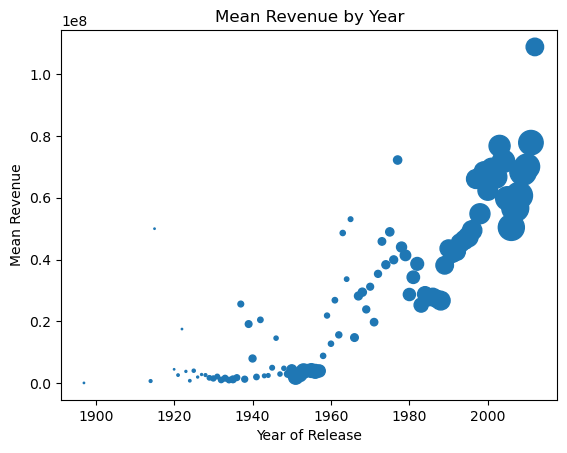

In [116]:
r_by_year = rmovies.groupby("Movie release date")['Movie box office revenue'].agg(['mean','size']).reset_index()
r_by_year.plot(kind = 'scatter', x = 'Movie release date', y = 'mean',s = 'size')
plt.title('Mean Revenue by Year')
plt.ylabel('Mean Revenue')
plt.xlabel('Year of Release');

From the above plot we see that the mean revenues increase over time. It would be interesting to normalize this by inflation or perhaps some share of GDP. We also see that there is much more data present in the later years (dot size scaled by amount of revenues averaged to form datapoint. 1897 - 1 movie revenue, 2008 - 367 movie revenues)

In [127]:
def correct_countries(x):
    if len(x)>2:
        x= x.split(':')[1][0:-1]
        res = x.split('"')[1]
    else:
        res = 'NA' 
    return res

movies["Movie countries corrected"]= movies["Movie countries"].apply(lambda x: correct_countries(x))

In [128]:
c_movies_filt = pd.DataFrame(movies.groupby(["Movie release date","Movie countries corrected"]).size()).reset_index()
c_movies_filt.set_axis(["Movie release date", "Movie countries corrected", 'Count'], axis='columns', inplace=True)
c_movies_filt.tail(10)

C:\Users\nerea\AppData\Local\Temp\ipykernel_8748\2871836013.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  c_movies_filt.set_axis(["Movie release date", "Movie countries corrected", 'Count'], axis='columns', inplace=True)


,Movie release date,Movie countries corrected,Count
4104,2013.0,United States of America,94
4105,2014.0,Australia,1
4106,2014.0,India,3
4107,2014.0,NA,8
4108,2014.0,United Kingdom,1
4109,2014.0,United States of America,4
4110,2015.0,NA,2
4111,2015.0,United States of America,2
4112,2016.0,NA,1
4113,2016.0,United States of America,2


In [164]:
most_common_count = movies.groupby(["Movie countries corrected"]).size().reset_index()
most_common_count = most_common_count.set_axis(["Country", "Number of movies"], axis='columns')
most_common_count.drop(most_common_count[most_common_count['Country'] == 'NA'].index, inplace = True)
most_common_count = most_common_count.sort_values("Number of movies", ascending=False)[0:10]
most_common_count

,Country,Number of movies
124,United States of America,34118
51,India,8294
123,United Kingdom,5477
40,France,3996
60,Japan,2321
58,Italy,1925
21,Canada,1471
3,Argentina,1291
48,Hong Kong,1120
5,Australia,874


In [167]:
top10_country_data = c_movies_filt[c_movies_filt['Movie countries corrected'].isin(most_common_count['Country'])]

,Movie release date,Movie countries corrected,Count
0,1888.0,United Kingdom,1
1,1889.0,United Kingdom,1
2,1890.0,United Kingdom,1
3,1890.0,United States of America,1
5,1891.0,United States of America,1
...,...,...,...
4106,2014.0,India,3
4108,2014.0,United Kingdom,1
4109,2014.0,United States of America,4
4111,2015.0,United States of America,2


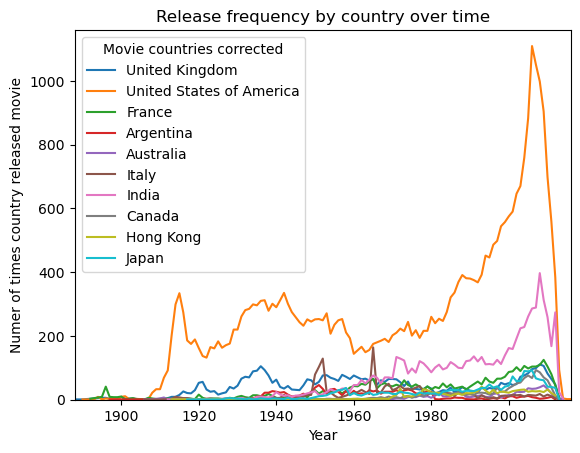

In [169]:
sns.lineplot(x='Movie release date', y='Count',data = top10_country_data, hue = 'Movie countries corrected', legend=True)
plt.xlabel("Year")
plt.ylabel("Numer of times country released movie")
plt.title("Release frequency by country over time")
plt.ylim([0,top10_country_data['Count'].max()+50])
plt.xlim([top10_country_data['Movie release date'].min(), top10_country_data['Movie release date'].max()]);
#plt.yscale('log')

In [ ]:
group countries by continent? currently there are 2124 unique country ID's... 

First step is split them from their freebase ID..? then pass in dictionary of continent: list of countries 

would make graph much more interpretable/ see pycountry-convert on github...

In [ ]:
characters.sample(3)

In [ ]:
print('There are {} entries in the characters dataset'.format(len(characters)))

In [ ]:
for name, values in characters.items():
    print ('{:.4} % of characters have an associated {}'.format(100 * len(values.loc[values.notnull()])/len(values), name))

In [ ]:
characters['Release Date'] = pd.to_datetime(characters['Release Date'], errors = 'coerce') #change all formats to datetime
characters['Release Date']=characters['Release Date'].dt.year                              #keep just the year of the datetime

In [ ]:
char_a_dropped = characters[characters['Actor age at Release'].notnull()]
#we see lots of NA ages at release... lets drop those

In [ ]:
char_a_dropped.loc[char_a_dropped['Actor age at Release']<0]

in the dataframe above we see 381 instances of negative ages.. Whats going on?
By taking the difference between the actor DOB and movie release date we realize that the actor age is correct magnitude wrong sign! below, we correct the column by taking its abs

In [ ]:
char_a_dropped['Actor age at Release'] = char_a_dropped['Actor age at Release'].abs()

#not sure why i get a warning, but it works...

In [66]:
print('Only {:.4} % of charactors have an associated actor age at release'.format(100 * len(char_a_dropped)/len(characters)))

NameError: name 'char_a_dropped' is not defined

In [ ]:
char_a_filt = char_a_dropped.groupby(["Release Date","Gender"])['Actor age at Release'].agg(['mean','size']).reset_index()
char_a_filt

In [ ]:
#now to break it down by gender...
#trying to include additional argument : scatter_kws={"s": char_a_filt['size']} , but get errors each time

sns.lmplot(x='Release Date', y='mean',data = char_a_filt, hue = 'Gender', scatter_kws={"s":5})
plt.xlabel("Year")
plt.ylabel("Average age of Actors")
plt.title("Average Age of Actors by Gender and Year of Release")
plt.ylim([0,100])
plt.xlim([char_a_filt['Release Date'].min(),char_a_filt['Release Date'].max()]);

In [ ]:
The two lines below run over the dataset before we grouped (get the actual average)

In [ ]:
char_a_dropped.loc[char_a_dropped['Gender'] == 'M']['Actor age at Release'].mean()

In [ ]:
char_a_dropped.loc[char_a_dropped['Gender'] == 'F']['Actor age at Release'].mean()

It is interesting to note that males tend to be older than women in cinema over the last hundred years. this difference is manifest in the average male age of 40 relative to a womens of 33. 
Another thing we see here is there the age seems to be rising. I propose that this is not as strongly the case as one would initially believe. My hypothesis is as follows: the age at release data is lacking for older actors at the beginning of the 20th century. simply put, record keeping was not as good as it is now. This is manifest in the fact that the data we do have on actors with roles in the early 20th century are all quite young - ie they lived long enough to enter modern database management 


In [ ]:
# This doesnt currenlty work but the idea is show how many entries are missing actor ages and break it down by decade
# in such a manner we can show that in earlier years there is a much larger proportion of missing data?

# characters.loc[characters['Actor age at Release'].isnull() and characters['Release Date'] < 1930]

In [ ]:
char_gen = pd.DataFrame(characters.groupby(['Release Date','Gender'])['Gender'].agg('size'))
char_gen.set_axis(['Count'],axis = 'columns', inplace = True)

In [ ]:
for i in set(char_gen.index):
    print (char_gen.loc[i])